# Potential Flow Examples

In this document I will be showing some common basic flows that I created for my undergraduate dissertation. We will see models of streamlines for uniform flow; sources and sinks; line vortex; dipole; flow around infinite long cylinder (ie a 2D circle).

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Mesh Grid Set-up

Cartesian mesh grid for use in functions and plots.

In [3]:
N = 200
x_s, x_e = -4, 4
y_s, y_e = -2, 2

x = np.linspace(x_s, x_e, N)
y = np.linspace(y_s, y_e, N)

X, Y = np.meshgrid(x, y)

## Uniform Flow

Simple uniform flow with a changeable angle of attack.

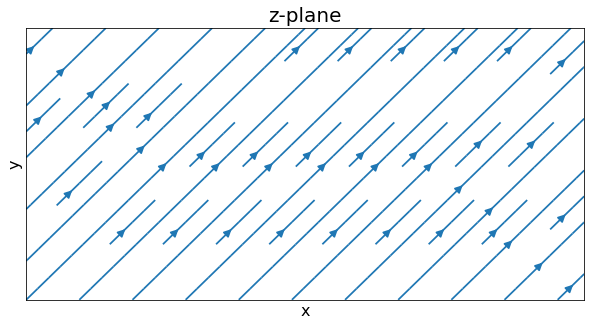

In [4]:
# Function Defining
#=======================================
def uniform_velocity(U, aoa):
    u = U * np.ones( (N,N), dtype=float ) * np.cos(aoa)
    v = U * np.ones( (N,N), dtype=float ) * np.sin(aoa)
    return u, v

# Parameters
#=======================================
U_0 = 1
alpha = (1/4) * math.pi

# Function Calling
#=======================================
u_uni, v_uni = uniform_velocity(U_0, alpha)

# Streamline Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])

# Streamline Plot
#=======================================
plt.streamplot(X, Y, u_uni, v_uni,
               density=0.75, linewidth=1.75, arrowsize=1.5, arrowstyle='-|>')

## Source and Sink

In [5]:
# Function Defining
#=======================================
def ss_velocity(m, X, Y):
    u = m / (2*math.pi) * (X) / ((X)**2 + (Y)**2)
    v = m / (2*math.pi) * (Y) / ((X)**2 + (Y)**2)
    return u,v

# Parameters
#=======================================
mu_source = 5
mu_sink = -5

# Function Calling
#=======================================
u1, v1 = ss_velocity(mu_source, X, Y)
u2, v2 = ss_velocity(mu_sink, X, Y)

### Source

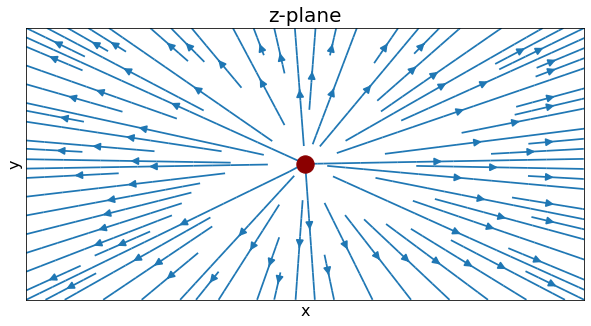

In [6]:
# Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])

# Source Plot
#=======================================
plt.streamplot(X, Y, u1, v1, 
               density=1, linewidth=1.75, arrowsize=1.5, arrowstyle='-|>')
plt.scatter(0, 0, zorder=2,
            color='darkred', s=300, marker='o')

### Sink

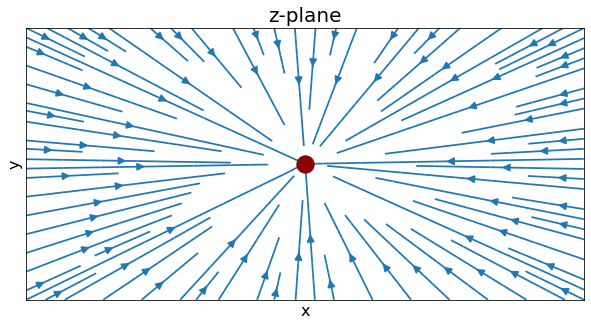

In [7]:
# Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])


# Sink Plot
#=======================================
plt.streamplot(X, Y, u2, v2, 
               density=1, linewidth=1.75, arrowsize=1.5, arrowstyle='-|>')
plt.scatter(0, 0, zorder=2,
            color='darkred', s=300, marker='o')

## Line Vortex

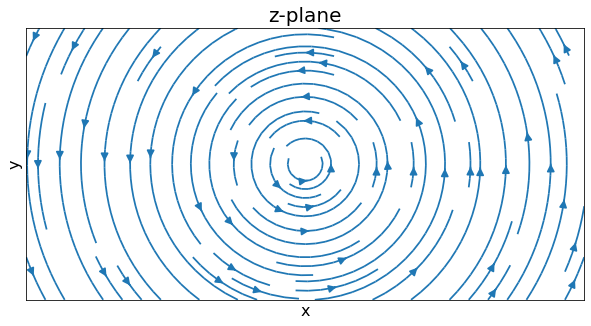

In [10]:
# Define Functions
#=======================================
def vortex_velocity(gam, X, Y):
    u = ( - gam / (2*math.pi) ) * ( (Y) / ( (X)**2 + (Y)**2 ) )
    v = ( gam / (2*math.pi) ) * ( (X) / ( (X)**2 + (Y)**2 ) )
    return u, v

# Parameters
#=======================================
gamma = 10

# Function Calling
#=======================================
u_vortex, v_vortex = vortex_velocity(gamma, X, Y)

# Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])


# Line Vortex Streamlines
#=======================================
plt.streamplot(X, Y, u_vortex, v_vortex, 
               density=1, linewidth=1.75, arrowsize=1.5, arrowstyle='-|>')

## Dipole

A source and sink as distance between them approaches zero $(a \rightarrow 0)$

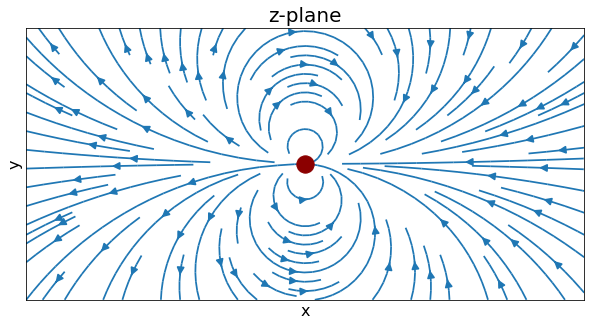

In [11]:
# Define Functions
#=======================================
def dipole_velocity(mu, X, Y):
    u = ( - mu / (2*math.pi) ) * ( ((X)**2 - (Y)**2) / ((X)**2 + (Y)**2)**2 )
    v = ( - mu / (2*math.pi) ) * ( ( 2*(X)*(Y) ) / ((X)**2 + (Y)**2)**2 )
    return u,v

# Parameters
#=======================================
mu = 6

# Function Calling
#=======================================
u_dipole, v_dipole = dipole_velocity(mu, X, Y)

# Streamline Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])

# Dipole Plot
#=======================================

# Streamlines
plt.streamplot(X, Y, u_dipole, v_dipole,
               density=1, linewidth=1.75, arrowsize=1.5, arrowstyle='-|>')

# Dipole Centre
plt.scatter(0, 0, zorder=2,
            color='darkred', s=300, marker='o')

## Superimposed Uniform Flow Over a Dipole

This creates a pseudo-cylinder which mimics a cylinder, as the flow inside the circle acts as boundary to the flow going past.

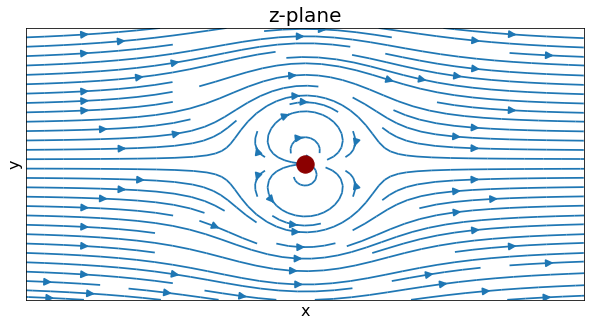

In [16]:
# Change angle of attack to zero
#=======================================
u_uniform, v_uniform = uniform_velocity(U_0, 0)

# Superposition
#=======================================
u_cyl, v_cyl = (u_uniform + u_dipole), (v_uniform + v_dipole)

# Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])

# Superposition Plot
#=======================================

#Streamlines
plt.streamplot(X, Y, u_cyl, v_cyl,
               density=1, linewidth=1.75, arrowsize=1.5, arrowstyle='-|>')

# Dipole centre
plt.scatter(0, 0, zorder=2,
            color='darkred', s=300, marker='o')

## Uniform Flow past a Stationary Cylinder

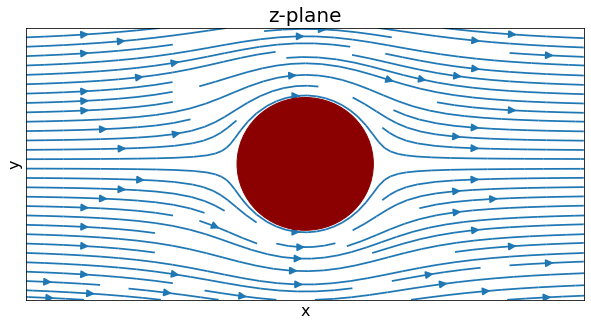

In [18]:
# Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])

# Streamplot Plot
#======================================

#Streamlines
plt.streamplot(X, Y, u_cyl, v_cyl,
               density=1, linewidth=1.75, arrowsize=1.5, arrowstyle='-|>')

#Circle
rad = math.sqrt( mu / (2 * math.pi * U_0))
circle = plt.Circle( (0,0), radius=rad, color='darkred', zorder=2)
plt.gca().add_patch(circle)

### Flow Past Cylinder with Contour Lines

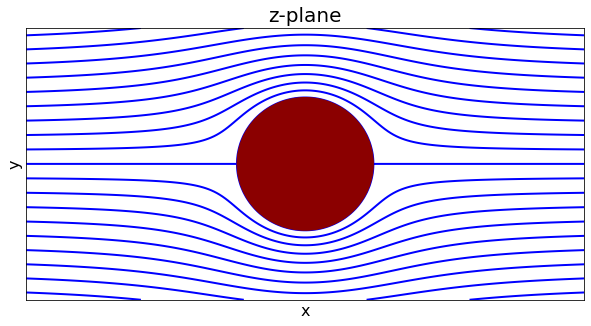

In [22]:
# Stream Functions
#=======================================

def uniform_stream(U, aoa, X, Y):
    psi = ( U * Y * np.cos(aoa) ) - ( U * X * np.sin(aoa) ) 
    return psi
def dipole_stream(mu, X, Y):
    psi = ( -mu / (2*math.pi) ) * ( (Y) / ( (X)**2 + (Y)**2 ) )
    return psi

# Function Calling
#=======================================
psi1 = uniform_stream(U_0, 0, X, Y)
psi2 = dipole_stream(mu, X, Y)

# Superposition
#=======================================
psi = psi1 + psi2

# Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])

# Contour Plot
#======================================

# Contour Lines
plt.contour(X, Y, psi, 
            250, colors='blue', linewidths=2, linestyles='solid')

# Circle
rad = math.sqrt( mu / (2 * math.pi * U_0))
circle = plt.Circle( (0,0), radius=rad, color='darkred', zorder=2)
plt.gca().add_patch(circle)

## Flow Around Cylinder with Circulation

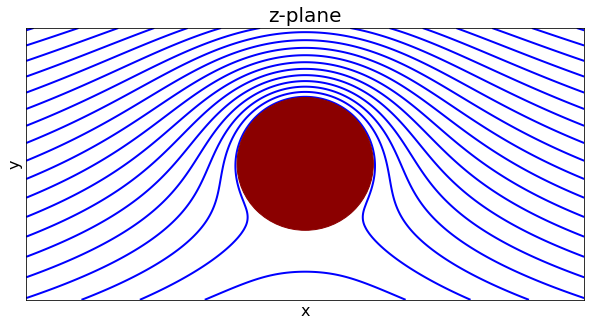

In [24]:
# Vortex Streamfunction
#=======================================

def vortex_stream(gam, X, Y):
    psi = ( - gam / (4*math.pi) ) * ( np.log( (X)**2 + (Y)**2 ) )
    return psi

# Function Calling
#=======================================
psi3 = vortex_stream(gamma, X, Y)

# Superposition
#=======================================
psi_circ = psi1 + psi2 - psi3

# Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])

# Contour Lines
plt.contour(X, Y, psi_circ, 
            200, colors='blue', linewidths=2, linestyles='solid')

# Circle
rad = math.sqrt( mu / (2 * math.pi * U_0) )
circle = plt.Circle( (0,0), radius=rad, color='darkred', zorder=2)
plt.gca().add_patch(circle)

## Stagnation Points

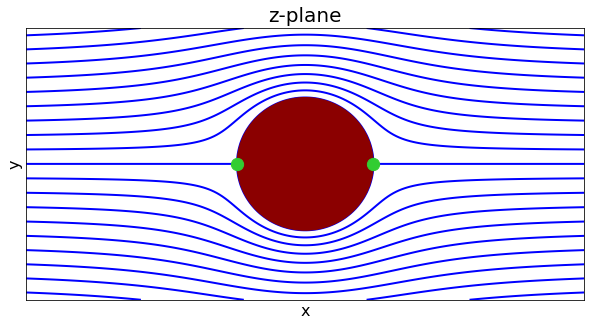

In [25]:
# Plot
#=======================================
plt.figure(figsize=(10, 5))

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("z-plane", fontsize=20)
plt.xlim(x_s, x_e)
plt.ylim(y_s, y_e)
plt.xticks([])
plt.yticks([])

# Contour Plot
#======================================

# Contour Lines
plt.contour(X, Y, psi, 
            250, colors='blue', linewidths=2, linestyles='solid')

# Circle
rad = math.sqrt( mu / (2 * math.pi * U_0))
circle = plt.Circle( (0,0), radius=rad, color='darkred', zorder=2)
plt.gca().add_patch(circle)


# Stagnation Points
x1_stag, y1_stag = math.sqrt(mu / (2 * math.pi * U_0)), 0
x2_stag, y2_stag = - math.sqrt(mu / (2 * math.pi * U_0)), 0

plt.scatter([x1_stag, x2_stag], [y1_stag, y2_stag],
               color='limegreen', s=150, marker='o', zorder=3);